In [ ]:

font = ImageFont.load_default()

draw = ImageDraw.Draw(img)
font = ImageFont.truetype("arial.ttf", size=30)
draw.text((10, 10), "", fill=(255,255,255), font=font)
img.save("xyz.png")

In [ ]:

img = Image.open("/content/1.png")
draw = ImageDraw.Draw(img)
draw.text(( 20, 32), "My data science capstone project was published in the JPL Tech Report. Go check it out", (255,0,0), font=font)
img.save("xyz.png")

In [ ]:
# font = ImageFont.truetype("/path/to/font.ttf", size=20)
from PIL import Image, ImageDraw, ImageFont

 
img = Image.open("/content/1.png")
draw = ImageDraw.Draw(img)
 
text = "My data science capstone project was published in the JPL Tech Report ct was published in the JPL Tech Reportct was published in the JPL Tech Report. Go check it out"
w, h = draw.textsize(text, font=font)

if w > img.width:
  text1 = text[:int(len(text)/2)]
  text2 = text[int(len(text)/2):]
  draw.text((5, img.height-60), text1, (255,255,255), font=font)
  draw.text((5, img.height-30), text2, (255,255,255), font=font)
else:
  draw.text((5, img.height-30), text, (255,255,255), font=font)

img.save("xyz.png")

--2022-11-29 06:59:11--  https://huggingface.co/spaces/ysharma/lets_make_meme/blob/main/font1.ttf
Resolving huggingface.co (huggingface.co)... 54.147.99.175, 34.227.196.80, 2600:1f18:147f:e800:3df1:c2fc:20aa:9b45, ...
Connecting to huggingface.co (huggingface.co)|54.147.99.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34698 (34K) [text/html]
Saving to: ‘font1.ttf’

font1.ttf           100%[===================>]  33.88K  --.-KB/s    in 0.09s   

2022-11-29 06:59:12 (392 KB/s) - ‘font1.ttf’ saved [34698/34698]



In [ ]:
# !wget https://huggingface.co/spaces/Xhaheen/meme_world/blob/main/arial.ttf

from PIL import Image, ImageDraw, ImageFont


 
# font = ImageFont.load_default()
font = ImageFont.truetype("/content/arial.ttf", 30)
img = Image.open("/content/1.png")
draw = ImageDraw.Draw(img)
 
text = "My data science capstone project was published in the JPL Tech Report ct was published in the JPL Tech Reportct was published in the JPL Tech Report. Go check it out"


w, h = draw.textsize(text, font=font)

if w > img.width:
  text1 = text[:int(len(text)/2)]
  text2 = text[int(len(text)/2):]
  draw.text((5, img.height-90), text1, (255,255,255), font=font)
  draw.text((5, img.height-60), text2, (255,255,255), font=font)
else:
  draw.text((5, img.height-60), text, (255,255,255), font=font)

img.save("xyz.png")
img

In [22]:


def add_text_to_image(img, text):
  font = ImageFont.truetype("/content/arial.ttf", 30)
  draw = ImageDraw.Draw(img)
  max_width = img.width - 10
  max_height = img.height - 10
  x, y = 5, img.height - 60
  current_height = 0

  for line in text.split('\n'):
    w, h = draw.textsize(line, font=font)
    if w > max_width:
      line_words = line.split(' ')
      i = 0
      while i < len(line_words):
        line_to_print = ' '.join(line_words[i:i+2])
        w, h = draw.textsize(line_to_print, font=font)
        if current_height + h > max_height:
          x = 5
          y = img.height - 60
          current_height = 0
        draw.text((x, y), line_to_print, (255,255,255), font=font)
        x += w
        current_height += h
        i += 2
    else:
      if current_height + h > max_height:
        x = 5
        y = img.height - 60
        current_height = 0
      draw.text((x, y), line, (255,255,255), font=font)
      current_height += h
      if current_height + h > max_height:
        x = 5
        y = img.height - 60
        current_height = 0
  img.save("xyz.png")

In [24]:
img = Image.open("/content/1.png")
 
 
text = "My data science capstone project was published in the JPL Tech Report ct ect was published in the JPL Tech Report ct was  out"
 
 
add_text_to_image(img, text)

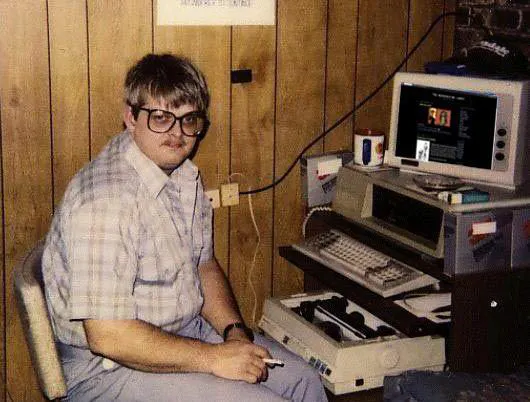

In [17]:


from PIL import Image, ImageDraw 

img = Image.open("/content/1.png")
text = "My data science capstone project was published in the JPL Tech Report ct was published in the JPL Tech Reportct was published in the JPL Tech Report. Go check it out"

#Get the size of the image 
width, height = img.size 
 
#Create a new image for the text 
txt = Image.new('RGBA', img.size, (255,255,255,0)) 
  
#Get a drawing context 
d = ImageDraw.Draw(txt) 

#Split the text into multiple lines
lines = text.split(' ')
text = ''
current_line = ''
max_width = width-20

#Add the words to the lines until the line width is greater than max_width
for word in lines:
  if len(current_line) + len(word) < max_width:
    current_line += word + ' '
  else:
    text += current_line + '\n'
    current_line = word + ' '

#Calculate position of the text 
position =  (width/2 - (len(current_line)*10)/2, height/2 - len(text.split('\n'))*20) 
  
#Draw the text 
d.text(position, text,  fill=(255,0,0,255))
  
#Combine the image and the text 
img.paste(txt, (0,0), txt) 
  
#Save the image
img.save('image_with_text.png')
img

In [ ]:
!pip install gradio  transformers cohere

In [ ]:

import torch 
import re 
import gradio as gr
from transformers import AutoTokenizer, ViTFeatureExtractor, VisionEncoderDecoderModel 
import cohere
import os
# 
os.environ['key_srkian'] = 'AIj3mn11L1IiKOjfVYnxnjAElDjwhxWpTs7AMxTv'
key_srkian = os.environ["key_srkian"]
co = cohere.Client(key_srkian)#srkian
device='cpu'
encoder_checkpoint = "nlpconnect/vit-gpt2-image-captioning"
decoder_checkpoint = "nlpconnect/vit-gpt2-image-captioning"
model_checkpoint = "nlpconnect/vit-gpt2-image-captioning"
feature_extractor = ViTFeatureExtractor.from_pretrained(encoder_checkpoint)
tokenizer = AutoTokenizer.from_pretrained(decoder_checkpoint)
model = VisionEncoderDecoderModel.from_pretrained(model_checkpoint).to(device)


def predict(department,image,max_length=64, num_beams=4):
  image = image.convert('RGB')
  image = feature_extractor(image, return_tensors="pt").pixel_values.to(device)

  
  clean_text = lambda x: x.replace('<|endoftext|>','').split('\n')[0]
  caption_ids = model.generate(image, max_length = max_length)[0]
  caption_text = clean_text(tokenizer.decode(caption_ids))
  dept=department
  context= caption_text
  response = co.generate(
  model='large',
  prompt=f'create non offensive one line meme for given department and context\n\ndepartment- data science\ncontext-a man sitting on a bench with a laptop\nmeme- \"I\'m not a data scientist, but I play one on my laptop.\"\n\ndepartment-startup\ncontext-a young boy is smiling while using a laptop\nmeme-\"When your startup gets funded and you can finally afford a new laptop\"\n\ndepartment- {dept}\ncontext-{context}\nmeme-',
  max_tokens=20,
  temperature=0.8,
  k=0,
  p=0.75,
  frequency_penalty=0,
  presence_penalty=0,
  stop_sequences=["department"],
  return_likelihoods='NONE')
  reponse=response.generations[0].text
  reponse = reponse.replace("department", "")
  Feedback_SQL="DEPT"+dept+"CAPT"+caption_text+"MAMAY"+reponse
  

  font = ImageFont.truetype("arial.ttf", 30)
  img =  image
  draw = ImageDraw.Draw(img)
  
  text = "My data science capstone project was published in the JPL Tec "


  w, h = draw.textsize(text, font=font)

  if w > img.width:
    text1 = text[:int(len(text)/2)]
    text2 = text[int(len(text)/2):]
    draw.text((5, img.height-80), text1, (255,255,255), font=font)
    draw.text((5, img.height-50), text2, (255,255,255), font=font)
  else:
    font = ImageFont.truetype("arial.ttf", int(img.width/len(text)))
    draw.text((5, img.height-50), text, (255,255,255), font=font)
  img

     
  return img 



# input = gr.inputs.Image(label="Upload your Image", type = 'pil', optional=True)
 
 
 
output = gr.inputs.Image(label="  your meme")
#examples = [f"example{i}.jpg" for i in range(1,7)]
#examples = os.listdir() 
examples = [f"example{i}.png" for i in range(1,7)]

#examples=os.listdir()
#for fichier in examples:
  #  if not(fichier.endswith(".png")):
   #     examples.remove(fichier)
        
description= " Looking for a fun and easy way to generate memes? Look no further than Meme world! Leveraging large language models like GPT-3PT-3  / Ai21 / Cohere, you can create memes that are sure to be a hit with your friends or network . Created with ♥️ dicuss @[Xaheen](https://chat.whatsapp.com/BA2s37KvPrG4ach28iISBv). kindly share your thoughts in discussion session and use the app responsibly "
title = "Meme world 🖼️"
dropdown=["data science", "product management","marketing","startup" ,"agile","crypto" , "SEO" ]

article = "Created By :  Xaheen "

interface = gr.Interface(
        fn=predict,
        inputs = [gr.inputs.Dropdown(dropdown),gr.inputs.Image(label="Upload your Image", type = 'pil', optional=True)],
        
        theme="grass",
        outputs=output,
        # examples =[['data science', 'example5.png'],
        #     ['product management', 'example2.png'],
        #     ['startup', 'example3.png'],
        #     ['marketing', 'example4.png'],
        #     ['agile', 'example1.png'],
        #     ['crypto', 'example6.png']],
        title=title,
        description=description,
        article = article,
    )
interface.launch(debug=True)

In [ ]:
 !pip install gradio
 import gradio as gr

True

In [55]:


def text_on_image(img, text):
  text_arr = np.array([list(text)])
  text_arr = text_arr.reshape(len(text), 1, 1)

  x = int((img.shape[1] - cv2.getTextSize(text, cv2.FONT_HERSHEY_PLAIN, 1, 1)[0][0])/2)
  y = img.shape[0] - 95
  padding = 10

  for i in range(0, len(text), 50):
    line = text[i:i+50]
    w = cv2.getTextSize(line, cv2.FONT_HERSHEY_PLAIN, 1, 1)[0][0]
    if x + w + 2*padding >= img.shape[1]:
      x = int((img.shape[1] - cv2.getTextSize(text, cv2.FONT_HERSHEY_PLAIN, 1, 1)[0][0])/2)
      y += 30
    cv2.putText(img, line, (x+padding, y), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1, cv2.LINE_AA)
    x += w + 2*padding
   

  cv2.imwrite("xyz.png", img)
  img = cv2.imread('yz.png')

  return img

import cv2
import numpy as np
img = cv2.imread('/content/1.png')
text = "My data science capstone project was published in the JPL Tech  published in the JPL Tech Report. Go check it out"


img = cv2.imread('/content/1.png')
text = "My data science capstone project was published in the JPL Tech  published in the JPL Tech Report. Go check it out"


text_on_image(img, text)

In [ ]:
iface = gr.Interface(fn=text_on_image, 
                     inputs=[
                             gr.inputs.Image(shape=(None,None))
                             ,
                             gr.inputs.Textbox(lines=4)], 
                     outputs="image")

iface.launch(share=True,debug=True)

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://3bbf6e159a22a35e.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


True

In [ ]:

import gradio as gr

description= " Looking for a fun and easy way to generate memes? Look no further than Meme world! Leveraging large language models like GPT-3PT-3  / Ai21 / Cohere, you can create memes that are sure to be a hit with your friends or network . Created with ♥️ dicuss @[Xaheen](https://chat.whatsapp.com/BA2s37KvPrG4ach28iISBv). kindly share your thoughts in discussion session and use the app responsibly "
title = "Meme world 🖼️"

article = "Created By :  Xaheen "

 
interface = gr.Interface(
        fn=text_on_image,
        inputs = [gr.inputs.Dropdown(dropdown),gr.inputs.Image(label="Upload your Image", type = 'pil', optional=True)],
        
        theme="grass",
        outputs=output,
        # examples =[['data science', 'example5.png'],
        #     ['product management', 'example2.png'],
        #     ['startup', 'example3.png'],
        #     ['marketing', 'example4.png'],
        #     ['agile', 'example1.png'],
        #     ['crypto', 'example6.png']],
        title=title,
        description=description,
        article = article,
    )
interface.launch(debug=True)
 